# We will be analyzing the movies dataset
-----------------------------------------

First , importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  #to ignore warnings that pop up
warnings.filterwarnings('ignore')

Then , loading the dataset

In [2]:
df=pd.read_csv("tmdb-movies.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Questions about the dataset

   1-How many samples we have in our data
   
   2-How many null values we have
   
   3-How many columns with null values
   
   4-How many duplicates in our data
   
   5-Are there any outliers and how to deal with it
   
   5-How many samples remained after cleaning our data
   
   6-What is the correlation between  popularity and revenue. show it. 
   
   7-Visualize correlation between columns.
   
   8-Does the month the movie released in help with gaining more revenue. show it.
   
   9-Directors with largest number of movies?.show it.
   
   10-Actors who've been in the most movies?.show it
   
   11-How many genres we have in our data?
   
   12-Visualize the count of the most 15 common ones.
   
   13-The most common genre.
   
   14-Number of movies that earned revenue more than its budget
   
   15-Number of movies that earned revenue less than its budget
   
   16-Does the budget of the movie affect the ratings it recieves
   
   17-keywords that were repeated in many movies
   
   18-Do movies that use those common words get good ratings ?
   

Data WRANGLING
--------------------------

The fisrt step of the data wrangling process is to gather the data .
Fortunately,We have our data gathered in a csv file . So , let's move to data Assessing and get a strong grasp of our data.

In [3]:
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Notes:
---------
    1-According to the release_year	analysis ,the movies are between 1960 and 2015.
       (75% of our data before year 2011 )
    
    2-According to the vote_average analysis, the max vote is 9.2 and the min is 1.5 only.
      (the average voting of the movies provided is 5.97)
    
    3-According to the runtime analysis, the average runtime is 102 mins.
    4-According to the popularity analysis ,our data has an average of popularity of 0.64. 
    

In [4]:
df.shape  


(10866, 21)

we have 10866 movie sample and 21 columns in our data .

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Notes:
--------
    1-Columns ["homepage","tagline", "keywords" ,"production_companies" ,"imdb_id","cast","genres"
             ,"overview","director"] have null values --> 9 columns.
    
    2-A column like homepage ,most of its values are missing So i'll drop it in the data cleaning              part
  

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Notes:
--------
   -Most of our data is object or string data.

# Data cleaning part
--------------------------- 

In [7]:
sum(df.isna().any()) #nine columns with null values

9

In [8]:
df.duplicated().sum()

1

Notes:
----------
-we have nine columns with missing data. (Using the info function before, we know how many missing values are in each column)

-we have one duplicated row in our data.

In [9]:
#Dropping columns that would be out of use and have most null values
df.drop(columns=["homepage","tagline"], inplace=True )

In [10]:
#confirming columns were dropped
df.shape

(10866, 19)

In [11]:
# Now, let's drop null values
df.dropna(inplace=True)

In [12]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(8664, 19)

In [14]:
# let's work on outliers
df["runtime"].describe()

count    8664.000000
mean      103.829986
std        26.191973
min         0.000000
25%        91.000000
50%       100.000000
75%       113.000000
max       705.000000
Name: runtime, dtype: float64

In [15]:
#As shown , the min for runtime is 0 , let's see how many we have in our data
zero_runtime=df[df["runtime"]==0]
len(zero_runtime)

7

we have 7 movies with runtime equals zero

In [16]:
#removing outliers with runtime of zero.
list_=df.index[df["runtime"]==0].tolist()
df.drop(index=list_, axis=0, inplace =True)

In [17]:
# confirming the drop
df.shape

(8657, 19)

It's not applicable that a movie is with zero budget or revenue.
so let"s see how many of them in our data


In [18]:
len(df[df["budget"]==0])

3932

In [19]:
len(df[df["revenue"]==0])

4121

if we dropped them , we'll lose most of our data .So , we'll keep them

# Exploring Data

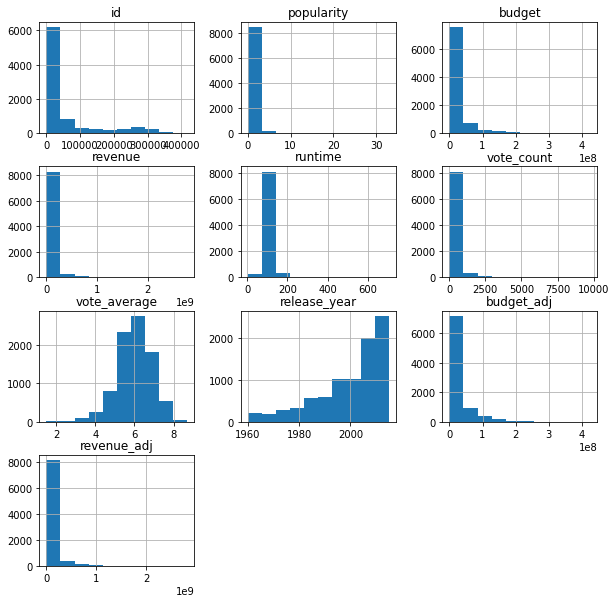

In [20]:
# visualizing using histogram
df.hist(figsize=(10,10));

Notes
------
  1- release_year data is left skewed .We can see that most of the movies are after 2000.
  
  2- the vote average is between 2 and 8. 

<AxesSubplot:>

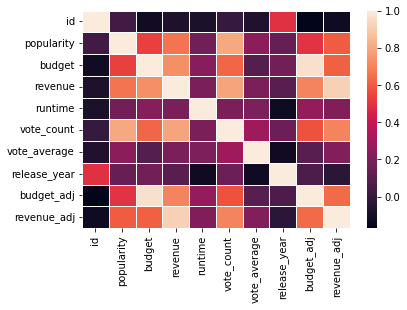

In [21]:
#Let's visualize correlation between columns
sns.heatmap(df.corr(),cbar=True,linewidths=.8)

Notes
------
  -As shown,there is a strong correlation between popularity and budget,revenue.
  
  -As shown,there is a strong correlation between budget and revenue.


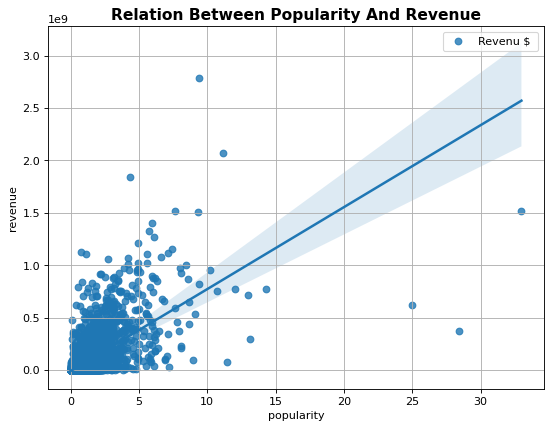

In [55]:
# plotting correlation between  popularity and revenue..
from matplotlib.pyplot import figure
plt.figure
figure(figsize=(8,6), dpi=80)
sns.regplot(x=df["popularity"] , y=df["revenue"] )
plt.title('Relation between popularity and revenue'.title(),
               fontsize = 14, weight = "bold")
plt.legend(['Revenu $ '])
plt.grid()
plt.show()

let's see whether the month the movie released in helps with gaining more revenue


In [23]:
#1- First , we need to convert the release_year column to date
df["release_date"]=pd.to_datetime(df["release_date"])

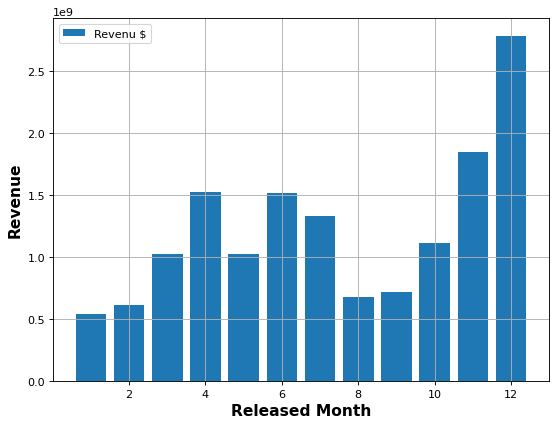

In [56]:
#Visualizing the relation between month and revenue
figure(figsize=(8, 6), dpi=80)
x=df["release_date"].dt.month
y=df["revenue"] 
plt.bar(x,y)
plt.xlabel('Released month'.title(),
               fontsize = 14, weight = "bold")
plt.ylabel('Revenue'.title(),
               fontsize = 14, weight = "bold")
plt.legend(['Revenu $'])
plt.grid()
plt.show()

Notes
------

As shown , movies released in months december and june get higher revenue. So , these are common seasons for movies. 

Q:Directors with largest number of movies?

In [25]:
#First , let's see how many directors we have 
df["director"].unique().size

3946

we have 3946 director in our data

In [41]:
#function for finding and visualizing most common elements in our data like directors
def common_elements(data , x, y , title , ylabel , xlabel):
    fig, ax = plt.subplots(figsize=(10,8))

    #Appling counter to get number of actors n then get the most common with the most_common function.
    lst = Counter(data).most_common(5)
    df2 = pd.DataFrame(lst, columns=[x,y])
    df2.plot.bar(x,y, ax=ax)
    plt.title(title.title(),
               fontsize = 14, weight = "bold")
    plt.ylabel(ylabel.title(),
               fontsize = 10, weight = "bold")
    plt.xlabel(xlabel.title(),
               fontsize = 10, weight = "bold")
    plt.grid()
    plt.show()

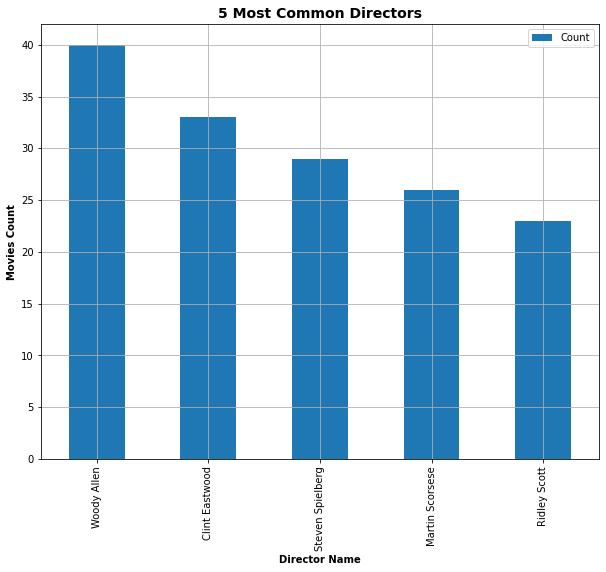

In [42]:
#visualizing using bar chart 5 common directors.
directors = pd.Series(df["director"])

#applying common_elements function
common_elements (directors ,'director' ,'Count' ,'5 Most common directors',
              'movies count' ,'director name')



Notes
------

we can see that Woody Allen directed 40 movie (the largest number of movies directed by the same director.)

Q: Actors who've been in the most movies?

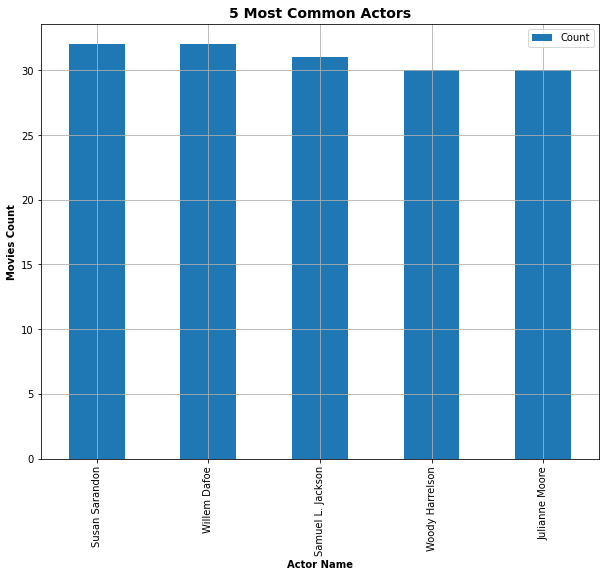

In [43]:
# visualizing using bar chart to see the common 5 actors

#fisrt , we have to split the cast column and add to the series
actors = pd.Series(' '.join(df["cast"]).split('|')) 
#applying common_elements function
common_elements (actors ,'actor' ,'Count' ,'5 Most common actors',
              'movies count' ,'actor name')

-We can see that Susan and William played almost in 30 movies.

In [44]:
#let's see how many genres we have in our data
df.genres.unique().size

1783

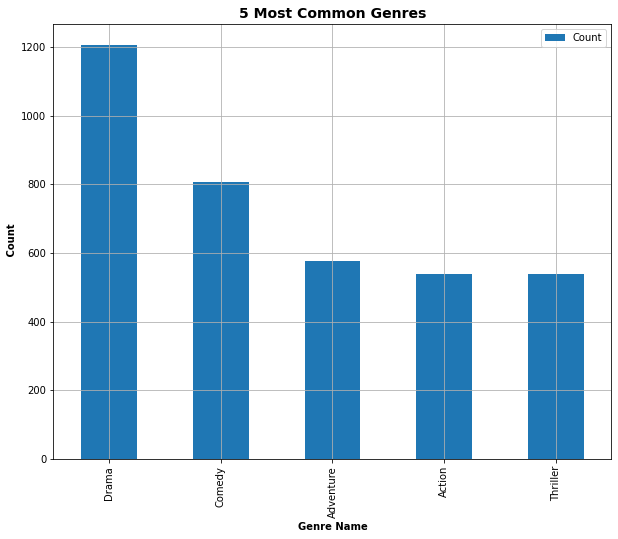

In [45]:
# Visualizing MOST common Genres

#fisrt , we have to split the cast column and add to the series
genres = pd.Series(' '.join(df["genres"]).split('|'))

#applying common_elements function
common_elements (genres ,'genre' ,'Count' ,'5 Most common genres',
              ' count' ,'genre name')


-As shown , Drama is the most common genre

In [46]:
#number of movies that earned revenue more than its budget
more_revenue=df[df["budget"]<df["revenue"]]
len(more_revenue)

3551

In [47]:
#number of movies that earned revenue less than its budget
less_revenue=df[df["budget"]>df["revenue"]]
len(less_revenue)

2032

Q:  Does the budget of the movie affect the ratings it recieves

In [33]:
df["budget"].describe()

count    8.657000e+03
mean     1.772741e+07
std      3.358639e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+06
75%      2.100000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [34]:
#getting movies with budget higher or less the mean
more_df=df[df["budget"]>1.772741e+07]
less_df=df[df["budget"]<1.772741e+07]

In [35]:
#getting the mean of the vote average for those dataframes
mean_less=less_df["vote_average"].unique().mean()
mean_more=more_df["vote_average"].unique().mean()

Text(0.5, 1.0, 'Relation Between Budget And Average Rating')

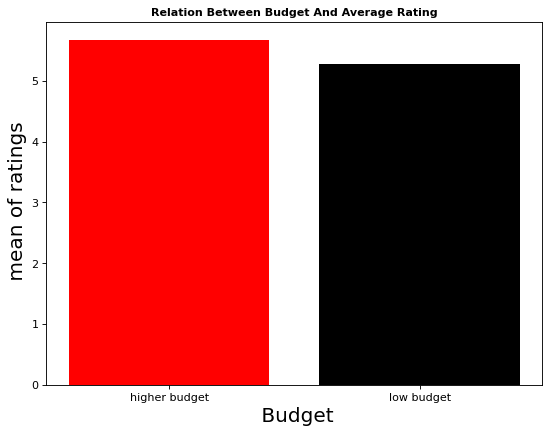

In [52]:
#visualizing the mean of the votes for those movies 
figure(figsize=(8, 6), dpi=80)
locations=[1,2]
values=[mean_more,mean_less]
colors=["red","black"]
plt.bar(locations,values,color=colors,tick_label=["higher budget","low budget"])
plt.ylabel(" mean of ratings" , fontsize=18)
plt.xlabel(" Budget",  fontsize=18)

plt.title("Relation between budget and average rating".title(),
               fontsize = 10, weight = "bold")


Notes
------


-The mean ratings for movies with higher revenue is more than movies with lower revenue

Q: sorting the movies according to release_date .

In [ ]:
sorted_df=df.sort_values(by=['release_date'])
sorted_df.head(3)

In [ ]:
#genres with maxiam rating
df.groupby(df['genres'])['vote_average'].max()

In [ ]:
# keywords
df["keywords"].head(2)

In [ ]:
# keywords that were repeated in many movies.
keywords = pd.Series(' '.join(df["keywords"]).split('|'))

#applying common_elements function
common_elements (keywords,'keywords' ,'Count' ,'5 Most common keywords',
              'keywords count' ,'keyword')



 know that we know the keywords the catch people' attention.

In [ ]:
df[keywords=="independent film"]["vote_average"].mean()


In [ ]:
df[keywords=="independent film"]["vote_count"].sum()

In [ ]:
df[keywords=="sex"]["vote_average"].mean()

In [ ]:
df[keywords=="sex"]["vote_count"].sum()

From this analysis , we can conclude :

  -movies that use those common words get high number of votes and good ratings as well.  

Conclusion
-----------------
.Summarizing the analysis of our dataset :-

   (1) description of data .
   
   (2) Understanding of data as metioned in the notes above.
      
   (4) Cleaning undesirable data .
   
     ( I will elaborate more on this in the limitations section down below.)
     
   (3) Visualazing our data and some interesting findings from it like:
   
      1-Drama is the most common genre.
      
      2-Movies released in months december and june get higher revenue.
      
      3-Woody Allen directed largest number of movies .
      
      4-The mean ratings for movies with higher revenue is more than movies with lower revenue.
      
      5-Movies that use those common words get high number of votes and good ratings as well.

Limitations
-----------------
  (1)The current dataset have many missing records.
  
      (If we ignored them , we would have lost most of our data.)
  
  (2)There are many columns that provided useless info about out data.
  
     (the results would have been clearer if we had related fields.)
     
  (3)There are wrong values taken while recording the data . 
     
     (for example, we have movies with runtime 0 or 900 mintues! . that's impossible. of course,
     it has affected oue results)
